### Assignment

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

#### Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

#### Tasks

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in `medical_data_visualizer.py`:
* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

Any time a variable is set to `None`, make sure to set it to the correct code.

Unit tests are written for you under `test_module.py`.

### Development

For development, you can use `main.py` to test your functions. Click the "run" button and `main.py` will run.

### Testing 

We imported the tests from `test_module.py` to `main.py` for your convenience. The tests will run automatically whenever you hit the "run" button.

### Submitting

Copy your project's URL and submit it to freeCodeCamp.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
df = pd.read_csv('C:/Users/Frances-Anthony/Documents/Udacity/Freecodecamp/medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [95]:
###indexxing dataframe using iloc (to retrieve specific rows and columns)
#df.iloc[:5,:]#fisrt 5 rows and all the columns
#df.iloc[:5]
#df.iloc[5:,5:] #rows from position 5 onwards, and columns from position 5 onwards.
#df.iloc[:,0] #the first column, and all of the rows for the column.
#df.iloc[9,:] #the 10th row, and all of the columns for that row.
#df.iloc[:,1:] # prints all rows, removes first column(rows b4 comma, column after comma)

In [96]:
##indexing using labels
#df.loc[0:5,:] #the only difference with iloc is that loc shows the 5 rows requested
#df.loc[10:20,]

In [97]:
#df.loc[:5, 'age'] # accessing a particular column
#df.loc[:5,['age', 'height']] # accessing two columns, first five rows, by putting them in a list

When we retrieve a single column, we’re actually retrieving a Pandas Series object. 
A DataFrame stores tabular data, **but a Series stores a single column or row of data**
A Series can contain any type of data, **including mixed types.**
#### s2 = pd.series([1, 2]) or s2 = pd.Series(["Boris Yeltsin", "Mikhail Gorbachev"])

In [98]:
#df.loc[:, 'age'] # all rows for age column
#df.iloc[:, 1] # all rows for 2 column which is age 
#df['age'] #calling the column directly

#this last method can all be used to access multiple column by putting them in a list
#df[['age', 'gender']]

In [99]:
#type(df[['age', 'gender']]), type(df['age'])

In [7]:
#rename column headings for alcohol and glucose
df = df.rename(columns = {'gluc':'glucose', 'alco':'alcohol'})
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### QUESTION 1: 
Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

#### STEP 1

In [9]:
#calculate BMI
BMI = df['weight']/(df['height']/100)** 2
BMI.head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
dtype: float64

#### STEP 2

In [10]:
#create new column called overweight, if BMI is > 25 the person is overwight
df['over_weight'] = (df['weight']/(df['height']/100)** 2) > 25
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio,over_weight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,True


#### QUESTION 2:
Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or glucose is 1, make the value 0. If the value is more than 1, make the value 1.

In [11]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [12]:
#Normalize the data by making 0 always good and 1 always bad. 
#If the value of cholesterol or gluc is 1, make the value 0. 
#If the value is more than 1, make the value 1.

dict = {1:0, 2:1, 3:1}
df['cholesterol'] = df['cholesterol'].map(dict)

In [13]:
df['glucose'] = df['glucose'].replace(dict)

In [14]:
df['cholesterol'].unique()

array([0, 1], dtype=int64)

In [15]:
df['glucose'].unique()

array([0, 1], dtype=int64)

In [16]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio,over_weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False


#### QUESTION 3:
Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

In [17]:
df.cardio.unique()

array([0, 1], dtype=int64)

In [18]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [19]:
zero_cardio = df[df['cardio'] == 0]
one_cardio = df[df['cardio'] == 1]

In [20]:
split = df.groupby('cardio')
split.groups

{0: [0, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 32, 35, 36, 37, 40, 47, 48, 49, 50, 55, 56, 60, 62, 63, 66, 72, 74, 80, 81, 85, 89, 90, 93, 94, 95, 96, 100, 101, 102, 103, 112, 114, 116, 118, 119, 123, 125, 126, 131, 132, 133, 136, 137, 138, 139, 140, 145, 146, 148, 149, 152, 157, 160, 161, 162, 163, 164, 167, 173, 175, 176, 177, 178, 180, 183, 185, 186, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, ...], 1: [1, 2, 3, 7, 15, 22, 24, 30, 31, 33, 34, 38, 39, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 57, 58, 59, 61, 64, 65, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 82, 83, 84, 86, 87, 88, 91, 92, 97, 98, 99, 104, 105, 106, 107, 108, 109, 110, 111, 113, 115, 117, 120, 121, 122, 124, 127, 128, 129, 130, 134, 135, 141, 142, 143, 144, 147, 150, 151, 153, 154, 155, 156, 158, 159, 165, 166, 168, 169, 170, 171, 172, 174, 179, 181, 182, 184, 187, 192, 194, ...]}

In [21]:
split.size()

cardio
0    35021
1    34979
dtype: int64

In [38]:
sb.set_theme(style="ticks", color_codes=False)

In [32]:
cat_data = df.groupby(["cardio", "cholesterol", "glucose", "alcohol", "smoke", "active"])
df_cat = cat_data.size().rename("total")

In [40]:
df_cat = cat_data.size().rename("total")
#df_cat

In [41]:
df_cat.reset_index().melt(['total', 'cardio'])

,total,cardio,variable,value
0,4550,0,cholesterol,0
1,19867,0,cholesterol,0
2,245,0,cholesterol,0
3,1455,0,cholesterol,0
4,94,0,cholesterol,0
...,...,...,...,...
315,216,1,active,1
316,30,1,active,0
317,163,1,active,1
318,27,1,active,0


In [43]:
#sb.catplot(data = df_cat, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None)

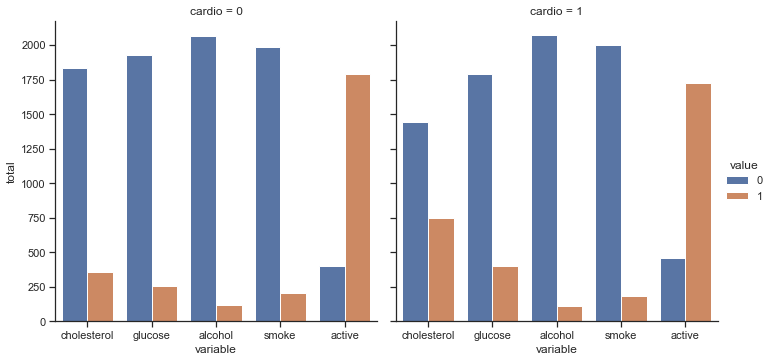

In [39]:
df_cat = df.groupby(["cardio", "cholesterol", "glucose", "alcohol", "smoke", "active"]).size().rename("total").reset_index().melt(['total', 'cardio'])

sb.catplot(data = df_cat, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None)
  
#plt.savefig('catplot.png')

#### QUESTION 4:

#### Clean the data. Filter out the following patient segments that represent incorrect data:

- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

#### STEP  1
Filter out: diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

- Systolic blood pressure (ontop)	= ap_hi	
- Diastolic blood pressure (below) = ap_lo

In [47]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio,over_weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,True


In [50]:
corr_data = (df['ap_lo'] <= df['ap_hi'])
corr_data.value_counts()

True     68766
False     1234
dtype: int64

In [60]:
dist_sys = df.query("ap_lo > ap_hi")
#dist_sys
dist_sys.ap_lo.count()

1234

In [61]:
df.shape

(70000, 14)

#### STEP 2:
Filter out: diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [64]:
correct_data = df[(df['ap_lo'] <= df['ap_hi']) 
             & (df['height'] >= df['height'].quantile(0.025))
             & (df['height'] <= df['height'].quantile(0.975))
             & (df['weight'] >= df['weight'].quantile(0.025))
             & (df['weight'] <= df['weight'].quantile(0.975))]

#### STEP 3:
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle.

In [68]:
#correlation matrix
corr_matrix = correct_data.corr()
#corr_matrix

<AxesSubplot:>

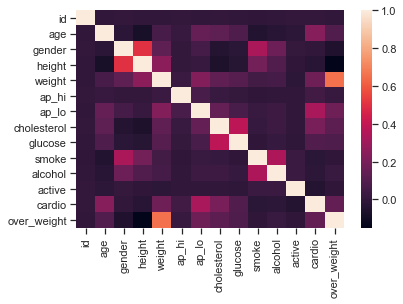

In [69]:
sb.heatmap(corr_matrix)

In [71]:
#Mask the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

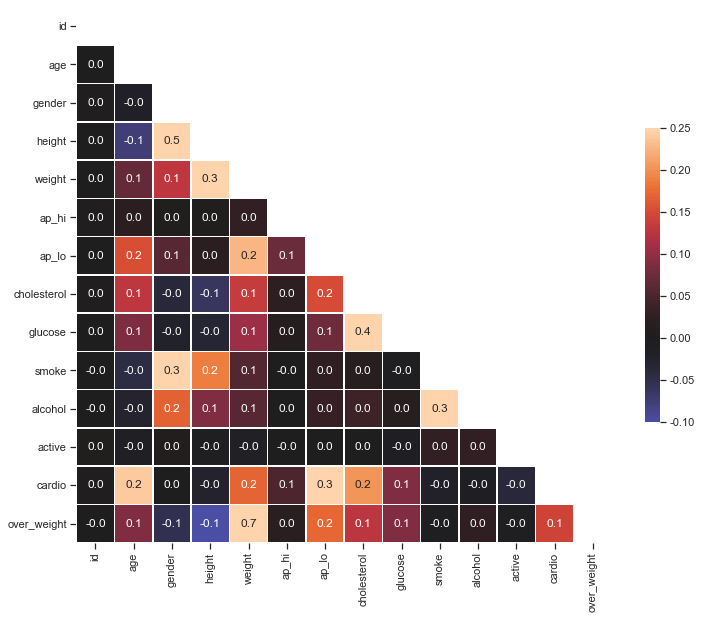

In [72]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))
# Draw the heatmap 
ax = sb.heatmap(corr_matrix, linewidths=.5,annot=True, fmt='.1f', mask=mask, square=True, center=0,vmin=-0.1, vmax=0.25, cbar_kws={
            'shrink': .45, 'format': '%.2f'})